In [1]:
# exemplo de como instalar um pacote via jupyter notebook
! pip install yellowbrick

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.metrics import silhouette_score,silhouette_samples
%matplotlib inline

In [3]:
# O dataset Iris é uma base de dados dentro do pacote sklearn, ideal para testes
iris = load_iris()

In [4]:
# No entanto ele não está em formato DataFrame
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
# Vamos transformá-lo em dataframe
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Vamos incluir no dataframe a nossa variável resposta
# Lembrando que num problema real, essa informação não existiria
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df['flower'].unique()

array([0, 1, 2])

In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'flower'],
      dtype='object')

#### Clusterização utilizando petal lenght & petal width

In [9]:
km = KMeans(n_clusters=3)
c1 = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
c1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
df['cluster1'] = c1
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]

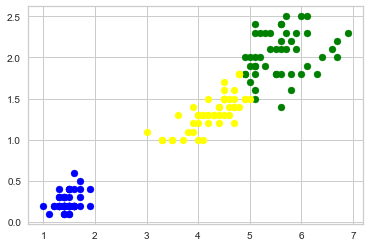

In [11]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

In [12]:
silhouette_score(df[['petal length (cm)', 'petal width (cm)']],df['cluster1'])

0.6604800083974887

#### Clusterização utilizando sepal lenght & sepal width

In [13]:
km = KMeans(n_clusters=3)
c2 = km.fit_predict(df[['sepal length (cm)', 'sepal width (cm)']])
c2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [14]:
df['cluster2'] = c2
df1 = df[df.cluster2==0]
df2 = df[df.cluster2==1]
df3 = df[df.cluster2==2]

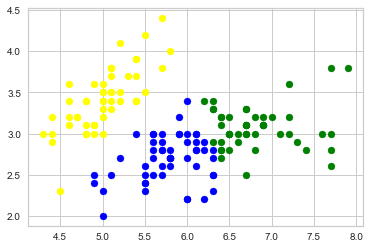

In [15]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='yellow')

In [16]:
silhouette_score(df[['sepal length (cm)', 'sepal width (cm)']],df['cluster2'])

0.4450525692083638

#### Clusterização utilizando todas as variáveis

In [17]:
km = KMeans(n_clusters=3)
c3 = km.fit_predict(df)
c3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
df['cluster3'] = c3
df1 = df[df.cluster2==0]
df2 = df[df.cluster2==1]
df3 = df[df.cluster2==2]

Apenar de utilizar todas as variáveis, para plotar precisamos escolher alguma delas. Lembrando que nós conseguimos visualizar no máximo em 3 dimensões

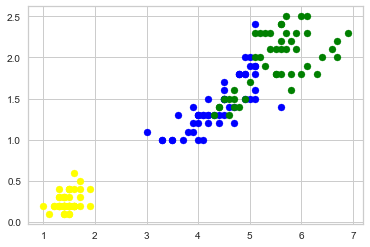

In [19]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

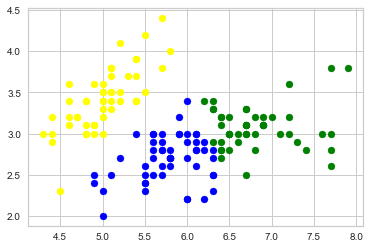

In [20]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='yellow')

In [21]:
silhouette_score(df,df['cluster3'])

0.6408405967101891

#### Elbow Plot

In [25]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

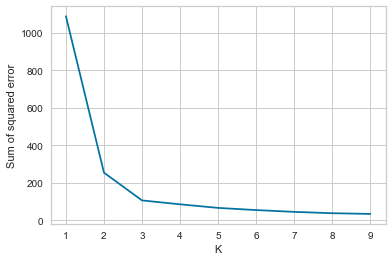

In [26]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

#### Visualização da Silhouette

Vamos verificar a silhoutte do cluster utilizado as variáveis petal lenght & petal width

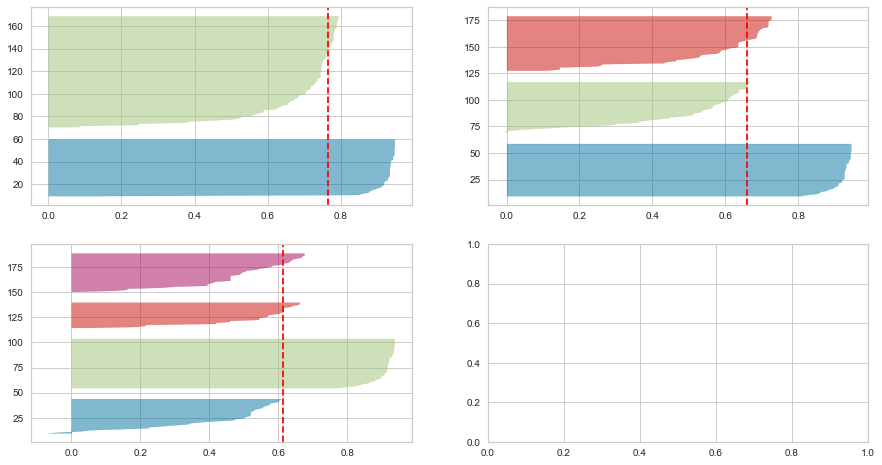

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4]:
    km_s = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km_s, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df[['petal length (cm)', 'petal width (cm)']])

Perguntas:
- O que podemos concluir das análises elbow e silhoutte?
- Como usar clusterização se queremos fazer um modelo de classificação em que não temos a variável resposta?